In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# 【問題1】コンペティション内容の把握

In [3]:
df = pd.read_csv("/Users/nobu/Desktop/home-credit-default-risk/application_train.csv")

pd.set_option("display.max_rows",200)
pd.set_option("display.max_columns",200)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

答え：<br>
Home Creditはどのような企業？
→信用が足りずに融資を受けることができない人に融資行う会社

このコンペティションでは何を予測する？
→顧客の返済能力

それを予測することで企業が得られるメリットは何？
→融資するかの判断が効率的になる

# 【問題2】データの概観の把握】

### A：.head()、.info()、describe()などを使う

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### レポート：各行に顧客データ、各列に信用情報を測る項目が記されている

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### レポート：文字データと数値データがある

In [5]:
pd.set_option("display.max_columns",122)
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [35]:
df.isnull().sum().sort_values(ascending=False).head(70)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

レポート：欠損値が１０万以上ある項目もある

### B：欠損値の有無を見る

In [6]:
miss_total = df.isnull().sum()
miss_top10 = miss_total.sort_values(ascending=False).head(10)
miss_worst10 = miss_total.sort_values(ascending=False)[60:70]
display(miss_top10)
display(miss_worst10)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
dtype: int64

DEF_60_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
EXT_SOURCE_2                 660
AMT_GOODS_PRICE              278
AMT_ANNUITY                   12
CNT_FAM_MEMBERS                2
DAYS_LAST_PHONE_CHANGE         1
AMT_CREDIT                     0
FLAG_OWN_CAR                   0
FLAG_EMAIL                     0
dtype: int64

レポート：各列の欠損値は２０万〜１まで、さらに大きく欠損しているデータは平均値や中央値、最頻値に関しての項目が多かった。

### C：クラスごとのデータ数をグラフに出す

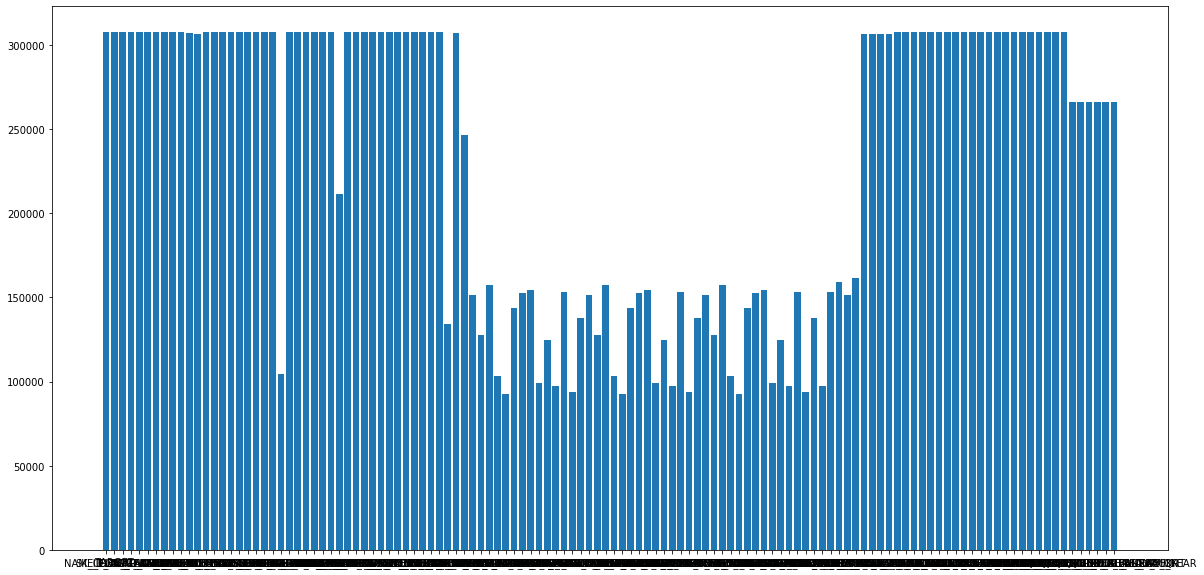

In [7]:
plt.figure(figsize=(20,10))
y = df.count()[:122]
x = df.columns[:122]
plt.tick_params(labelsize=10)
plt.bar(x,y)
plt.show()

レポート：欠損している項目と全て揃っている項目の差が激しい

# 【問題3】課題設定
### データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

A：どういった項目がTARGETとの相関が高いのか<br>B：なぜこんなに欠損しているデータがあるのか<br>C：欠損値の多い項目を削除したら相関係数に変化はあるか

# 【問題4】データ探索

## A:どういった項目がTARGETとの相関が高いのか

#### ①TARGETと相関の高い１０項目で相関係数行列を作る

In [4]:
cor_mat = df.corr(method="pearson")
high_cor_index = cor_mat.nlargest(20,"TARGET")["TARGET"].abs().index
high_cor_mat = df.loc[:,high_cor_index].corr(method="pearson")
display(high_cor_mat)

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION,OWN_CAR_AGE,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_WORK_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE
TARGET,1.000000,0.078239,0.060893,0.058899,0.055218,0.051457,0.050994,0.045982,0.044395,0.044346,0.041975,0.037612,0.032518,0.032248,0.031276,0.028524,0.019930,0.019187,0.009308,0.009131
DAYS_BIRTH,0.078239,1.000000,0.008073,0.009361,0.082939,0.272691,0.242401,0.619888,0.180382,0.109666,0.331912,0.005761,0.158882,0.000206,0.001925,0.172457,-0.071983,0.330938,0.278894,0.007425
REGION_RATING_CLIENT_W_CITY,0.060893,0.008073,1.000000,0.950842,0.025717,-0.007737,0.028081,-0.034712,0.045669,0.067083,0.074038,0.088820,-0.002805,0.013935,0.017076,0.013414,0.010683,0.024781,0.030778,0.030093
REGION_RATING_CLIENT,0.058899,0.009361,0.950842,1.000000,0.026022,-0.005103,0.008360,-0.032871,0.035741,0.062528,0.080210,0.087494,-0.019154,0.015394,0.017931,0.007349,0.011494,0.025423,0.029688,0.034330
DAYS_LAST_PHONE_CHANGE,0.055218,0.082939,0.025717,0.026022,1.000000,0.088576,0.046788,-0.021103,0.054183,-0.061760,0.056983,0.002506,0.021388,0.000423,0.002001,-0.041537,-0.112725,-0.005865,-0.027108,-0.014786
DAYS_ID_PUBLISH,0.051457,0.272691,-0.007737,-0.005103,0.088576,1.000000,0.099354,0.273611,0.076326,0.050309,0.101896,0.008633,0.061094,0.002738,0.004328,0.045964,-0.035099,-0.028019,-0.020912,-0.012454
REG_CITY_NOT_WORK_CITY,0.050994,0.242401,0.028081,0.008360,0.046788,0.099354,1.000000,0.256427,0.440409,0.056275,0.099874,0.016292,0.825575,0.000493,0.001884,0.121000,-0.008013,0.070650,0.070721,-0.004623
FLAG_EMP_PHONE,0.045982,0.619888,-0.034712,-0.032871,-0.021103,0.273611,0.256427,1.000000,0.092166,0.248534,0.212361,-0.028282,0.219219,-0.016557,-0.014034,0.233801,-0.049949,0.240714,0.233950,-0.005732
REG_CITY_NOT_LIVE_CITY,0.044395,0.180382,0.045669,0.035741,0.054183,0.076326,0.440409,0.092166,1.000000,0.003117,0.064334,0.009218,0.028112,0.007167,0.007557,0.045948,-0.004793,0.020072,0.012252,-0.012613
FLAG_DOCUMENT_3,0.044346,0.109666,0.067083,0.062528,-0.061760,0.050309,0.056275,0.248534,0.003117,1.000000,0.033740,0.036403,0.053945,0.012654,0.011762,0.060342,0.048214,0.056837,0.066130,0.026177


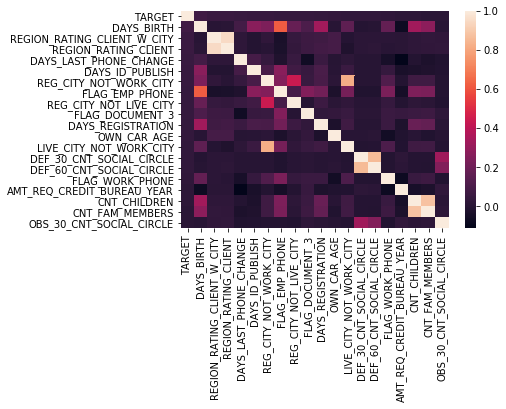

In [9]:
sns.heatmap(high_cor_mat)

相関係数の高い組み合わせは

・REGION_RATING_CLIENT(顧客が住んでいる州の当社の評価)/REGION_RATING_CLIENT_W_CITY(顧客が住んでいる都市の当社の評価(r=0.95)

・LIVE_CITY_NOT_WORK_CITY(連絡先が仕事先と都市レベルで同じか)/REG_CITY_NOT_WORK_CITY(連絡先が仕事先と州レベルで同じか）(r = 0.82)

・DEF_30_CNT_SOCIAL_CIRCLE(30日の延滞が何回あったか)/DEF_60_CNT_SOCIAL_CIRCLE(60日の延滞が何回あったか)(r = 0.86)

・CNT_CHILDREN(子供の人数)/CNT_FAM_MEMBERS(家族の人数)(r = 0.89)となった。

➡︎しかしこれでは数値データの項目しか抽出されないため結果として不適切である。そのため文字データを数値に変換する

#### ②文字データである特徴量を抜き出す

In [10]:
df.select_dtypes(include=object)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


#### ③ラベルだけ抜き出す

In [11]:
object_data = df.select_dtypes(include=object).columns#select_dtypes(include= )で任意の型を抜き出す
object_data

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

#### ④抜き出したカテゴリ型の特徴量をエンコーディング(Category Encoders)<br>https://qiita.com/Hyperion13fleet/items/afa49a84bd5db65ffc31

In [12]:
object_lst = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

ce_object = ce.OrdinalEncoder(cols=object_lst,handle_unknown='impute')
ce_df = ce_object.fit_transform(df)

ce_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,1,1,1,1,0,202500.0,406597.5,24700.5,351000.0,1,1,1,1,1,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1,1.0,2,2,1,10,0,0,0,0,0,0,1,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,1,1,0.0149,1,1,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,1,2,1,2,0,270000.0,1293502.5,35698.5,1129500.0,2,2,2,2,1,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2,2.0,1,1,2,11,0,0,0,0,0,0,2,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,1,1,0.0714,2,1,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,2,1,2,1,0,67500.0,135000.0,6750.0,135000.0,1,1,1,1,1,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1,1.0,2,2,2,9,0,0,0,0,0,0,3,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,3,2,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1,2,1,1,0,135000.0,312682.5,29686.5,297000.0,1,1,1,3,1,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,1,2.0,2,2,1,17,0,0,0,0,0,0,1,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### ⑤カテゴリ型特徴量をエンコーディングしたデータで再度相関係数行列積を求める

In [13]:
cor_mat = ce_df.corr(method="pearson")
high_cor_index = cor_mat.nlargest(20,"TARGET")["TARGET"].index
high_cor_mat = ce_df.loc[:,high_cor_index].corr(method="pearson")
display(high_cor_mat)

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION,EMERGENCYSTATE_MODE,HOUSETYPE_MODE,OWN_CAR_AGE,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_WORK_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN
TARGET,1.000000,0.078239,0.060893,0.058899,0.055218,0.051457,0.050994,0.045982,0.044395,0.044346,0.041975,0.041773,0.039406,0.037612,0.032518,0.032248,0.031276,0.028524,0.019930,0.019187
DAYS_BIRTH,0.078239,1.000000,0.008073,0.009361,0.082939,0.272691,0.242401,0.619888,0.180382,0.109666,0.331912,0.020183,0.021063,0.005761,0.158882,0.000206,0.001925,0.172457,-0.071983,0.330938
REGION_RATING_CLIENT_W_CITY,0.060893,0.008073,1.000000,0.950842,0.025717,-0.007737,0.028081,-0.034712,0.045669,0.067083,0.074038,0.166735,0.159087,0.088820,-0.002805,0.013935,0.017076,0.013414,0.010683,0.024781
REGION_RATING_CLIENT,0.058899,0.009361,0.950842,1.000000,0.026022,-0.005103,0.008360,-0.032871,0.035741,0.062528,0.080210,0.140499,0.133164,0.087494,-0.019154,0.015394,0.017931,0.007349,0.011494,0.025423
DAYS_LAST_PHONE_CHANGE,0.055218,0.082939,0.025717,0.026022,1.000000,0.088576,0.046788,-0.021103,0.054183,-0.061760,0.056983,0.031672,0.028553,0.002506,0.021388,0.000423,0.002001,-0.041537,-0.112725,-0.005865
DAYS_ID_PUBLISH,0.051457,0.272691,-0.007737,-0.005103,0.088576,1.000000,0.099354,0.273611,0.076326,0.050309,0.101896,0.015936,0.016769,0.008633,0.061094,0.002738,0.004328,0.045964,-0.035099,-0.028019
REG_CITY_NOT_WORK_CITY,0.050994,0.242401,0.028081,0.008360,0.046788,0.099354,1.000000,0.256427,0.440409,0.056275,0.099874,0.257072,0.234500,0.016292,0.825575,0.000493,0.001884,0.121000,-0.008013,0.070650
FLAG_EMP_PHONE,0.045982,0.619888,-0.034712,-0.032871,-0.021103,0.273611,0.256427,1.000000,0.092166,0.248534,0.212361,-0.009590,-0.004884,-0.028282,0.219219,-0.016557,-0.014034,0.233801,-0.049949,0.240714
REG_CITY_NOT_LIVE_CITY,0.044395,0.180382,0.045669,0.035741,0.054183,0.076326,0.440409,0.092166,1.000000,0.003117,0.064334,0.155823,0.142190,0.009218,0.028112,0.007167,0.007557,0.045948,-0.004793,0.020072
FLAG_DOCUMENT_3,0.044346,0.109666,0.067083,0.062528,-0.061760,0.050309,0.056275,0.248534,0.003117,1.000000,0.033740,0.032669,0.034481,0.036403,0.053945,0.012654,0.011762,0.060342,0.048214,0.056837


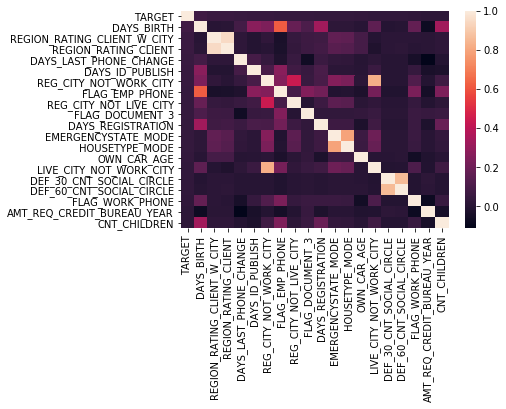

In [14]:
sns.heatmap(high_cor_mat)

相関係数の高い組み合わせにおいて変化した点は、CNT_FAM_MEMBERSが上位２０項目から外れ、
新たに追加された
・HOUSETYPE_MODE(エレベーターの数や築年数など住居に関する情報の最頻値)/EMERGENCYSTATE_MODE(同様に建物の情報？)(r=0.79)
が高い相関を示した。

➡︎EMERGENCYSTATE_MODE、HOUSETYPE_MODEが新しく上位２０個に追加されたが、そもそも相関係数が１番高いDAYS_BIRTHですら0.078ととても低い。
このような結果から、いきなり相関関係を導くのは難しいことがわかった。

しかし特徴量の中には、年収や過去の延滞履歴、持ち家かどうかなど、客観的に見て返済能力に関係のありそうな項目が多く含まれている。
そのため調査項目ではなく、データの形に不備があり正確な結果が得られていないことも考えられる。
例えば欠損値がそうした不備に挙げられると考えられる。上記相関係数行列では多くの欠損値を抱えるデータであってもそのまま使用してしまっていた。

こうした理由から欠損値について検討を行う。

## B：なぜこんなに欠損しているデータがあるのか

#### ①欠損値がどれくらいの数と割合で存在しているか確認

In [15]:
total = ce_df.isnull().sum().nlargest(70)
miss_ratio = round(total/307511*100)

total_df = pd.DataFrame(total,columns=["missing_total"])
ratio_df = pd.DataFrame(miss_ratio,columns=["missing_ratio(%)"])
missing_data = pd.concat([total_df,ratio_df],axis=1)
display(missing_data)

,missing_total,missing_ratio(%)
COMMONAREA_AVG,214865,70.0
COMMONAREA_MODE,214865,70.0
COMMONAREA_MEDI,214865,70.0
NONLIVINGAPARTMENTS_AVG,213514,69.0
NONLIVINGAPARTMENTS_MODE,213514,69.0
NONLIVINGAPARTMENTS_MEDI,213514,69.0
LIVINGAPARTMENTS_AVG,210199,68.0
LIVINGAPARTMENTS_MODE,210199,68.0
LIVINGAPARTMENTS_MEDI,210199,68.0
FLOORSMIN_AVG,208642,68.0


全１２２項目中67項目に欠損値があり、その中で41項目で欠損値が５０%以上を占めていた。
また欠損値上位５０のほとんどが何らかの平均・最頻値・中央値についてだった。
例えば顧客が住んでいる家の広さやエレベーターの数、入り口の数、共有スペースの広さなど
調査するにしても手間がかかり、顧客自身が理解しているか怪しい項目もある。
そのためこれらは貸主側からしてもそこまで追求する必要のない、分かったらいいくらいの重要な項目でないことが考えられる。

しかしこの欠損値トップ５０の中で、平均・最頻値・中央値以外のものが２つある。
OWN_CAR_AGE（今の車を所有してどれくらいか？？）と、EXT_SOURCE_1（外部データソースからの正規化スコア）だ。
この二つの項目がなぜ欠損値が多いのかについて検討する。

#### ②OWN_CAR_AGEの欠損値以外のデータを見る

In [16]:
del_miss_car = ce_df["OWN_CAR_AGE"].dropna(how="any")
print(len(del_miss_car))

104582


In [17]:
print(del_miss_car)
print("最大は{}".format(max(del_miss_car)))
print("最小は{}".format(min(del_miss_car)))

2         26.0
6         17.0
7          8.0
13        23.0
15        17.0
          ... 
307492     2.0
307494    15.0
307495     2.0
307497     0.0
307498    10.0
Name: OWN_CAR_AGE, Length: 104582, dtype: float64
最大は91.0
最小は0.0


➡︎数値が意味しているのは所有している期間(月)と考えられる。=数値が記載されているデータは車を所持している人。
そのため欠損値は車を所持していないということが考えられる。
だとすればデータ全てを+1して、欠損値を０で埋めることで分析に用いることができる？

#### ③EXT_SOURCE_1の欠損値以外のデータを見る

In [18]:
del_miss_source1 = ce_df["EXT_SOURCE_1"].dropna(how="any")
print(len(del_miss_source1))
print("最大は{}".format(max(del_miss_source1)))
print("最小は{}".format(min(del_miss_source1)))

134133
最大は0.962692770561306
最小は0.014568132412445587


In [19]:
print(del_miss_source1)

0         0.083037
1         0.311267
6         0.774761
8         0.587334
10        0.319760
            ...   
307500    0.896042
307503    0.243466
307506    0.145570
307508    0.744026
307510    0.734460
Name: EXT_SOURCE_1, Length: 134133, dtype: float64


➡︎数値が意味しているのは信用情報を管理する外部機関(日本で言うCICのようなもの？)における信用スコア
そのため欠損値は０で埋めることができると考えられる。

#### ④EXT_SOURCE_1,2,3の欠損値の数

In [20]:
ce_df["EXT_SOURCE_1"].isnull().sum()

173378

In [21]:
ce_df["EXT_SOURCE_2"].isnull().sum()

660

In [22]:
ce_df["EXT_SOURCE_3"].isnull().sum()

60965

➡︎外部信用情報機関によって欠損値の数が大きく違う。

これは日本と同じなのであれば、それぞれ役割が違うためだと考えられる。

例：CIC／指定信用情報機関：主に消費者金融や信販系クレジットカード会社など加盟する会員会社で登録・提供された信用情報

    JICC／日本信用情報機構：ネット専業銀行や地方銀行を中心とする銀行をはじめ、大手から中小までの消費者金融など幅広い種類の金融機関が加盟

    JBA（KSC）／全国銀行協会：メガバンクをはじめ、都市銀行や第一・第二地方銀行、ネット専業銀行や信託銀行など銀行が主に加盟する信用情報機関

In [23]:
EXT_SOURCE_1_df = pd.DataFrame(ce_df["EXT_SOURCE_1"],columns=["EXT_SOURCE_1"])
EXT_SOURCE_2_df = pd.DataFrame(ce_df["EXT_SOURCE_2"],columns=["EXT_SOURCE_2"])
EXT_SOURCE_3_df = pd.DataFrame(ce_df["EXT_SOURCE_3"],columns=["EXT_SOURCE_3"])
df_ext_source = pd.concat([EXT_SOURCE_1_df,EXT_SOURCE_2_df,EXT_SOURCE_3_df],axis=1)
display(df_ext_source)

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
1,0.311267,0.622246,NaN
2,NaN,0.555912,0.729567
3,NaN,0.650442,NaN
4,NaN,0.322738,NaN
...,...,...,...
307506,0.145570,0.681632,NaN
307507,NaN,0.115992,NaN
307508,0.744026,0.535722,0.218859
307509,NaN,0.514163,0.661024


日本では一つのローンを組む場合でも、そのローンの種類によっては同時に複数の信用情報機関に登録される。
そのためアメリカも同様であるならば上記のように、一人が複数の信用情報機関に登録されていてもおかしくはない。
そうした場合、ローンの種類との関連が見られるかもしれない。
そしてEXT_SOURCE_1が特に欠損値が多かったのは、日本でいうところのJBAのような、ローンとしての対象が狭い信用情報機関だったのかもしれない。

#### ⑤EXT_SOURCEそれぞれのデータを概観する

In [24]:
df_ext_source.describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,134133.000000,3.068510e+05,246546.000000
mean,0.502130,5.143927e-01,0.510853
std,0.211062,1.910602e-01,0.194844
min,0.014568,8.173617e-08,0.000527
25%,0.334007,3.924574e-01,0.370650
50%,0.505998,5.659614e-01,0.535276
75%,0.675053,6.636171e-01,0.669057
max,0.962693,8.549997e-01,0.896010


➡︎最小値が０より大きいため、欠損値はどれも０にしてもいいと考えられる。

#### ⑥1~6までの考察から以下三つを行い再度目的変数との相関行列係数を算出する
#### ・欠損値がデータの50％以上かつ、中央値・平均値・最頻値などに関する項目を削除
#### ・OWN_CAR_AGEのデータ全てを+1、欠損値を０で埋める
#### ・EXT_SOURCE１〜３の欠損値を０で埋める

## C：欠損値の多い項目を削除したら相関係数に変化はあるか

#### ①欠損値５０%以上の項目を削除する

In [25]:
del_ce_df = ce_df.dropna(thresh=153755,axis=1)
del_ce_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,1,1,1,1,0,202500.0,406597.5,24700.5,351000.0,1,1,1,1,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1,1.0,2,2,1,10,0,0,0,0,0,0,1,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,1,1,0.0149,1,1,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,1,2,1,2,0,270000.0,1293502.5,35698.5,1129500.0,2,2,2,2,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2,2.0,1,1,2,11,0,0,0,0,0,0,2,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,1,1,0.0714,2,1,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,2,1,2,1,0,67500.0,135000.0,6750.0,135000.0,1,1,1,1,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1,1.0,2,2,2,9,0,0,0,0,0,0,3,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,3,2,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1,2,1,1,0,135000.0,312682.5,29686.5,297000.0,1,1,1,3,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,1,2.0,2,2,1,17,0,0,0,0,0,0,1,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,3,2,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,1,1,1,1,0,121500.0,513000.0,21865.5,513000.0,1,1,1,1,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,2,1.0,2,2,3,11,0,0,0,0,1,1,4,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,3,2,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,1,1,2,0,157500.0,254700.0,27558.0,225000.0,1,1,1,5,3,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,7,1.0,1,1,3,15,0,0,0,0,0,0,18,0.681632,NaN,0.9876,0.6042,0.9782,0.4583,0.9876,0.6042,1,1,0.2898,1,1,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,1,2,1,1,0,72000.0,269550.0,12001.5,225000.0,1,4,1,4,1,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,5,1.0,2,2,2,8,0,0,0,0,0,0,6,0.115992,NaN,0.9727,0.0833,0.9727,0.0833,0.9727,0.0833,1,1,0.0214,1,1,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,1,2,1,1,0,153000.0,677664.0,29

#### ②消えてしまったOWN_CAR_AGEを＋１して、EXT_SOURCE１をそのまま復活させる

In [26]:
re_ce_df = pd.concat([del_ce_df,ce_df["OWN_CAR_AGE"]+1,ce_df["EXT_SOURCE_1"]],axis=1)
display(re_ce_df)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OWN_CAR_AGE,EXT_SOURCE_1
0,100002,1,1,1,1,1,0,202500.0,406597.5,24700.5,351000.0,1,1,1,1,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1,1.0,2,2,1,10,0,0,0,0,0,0,1,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,1,1,0.0149,1,1,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.083037
1,100003,0,1,2,1,2,0,270000.0,1293502.5,35698.5,1129500.0,2,2,2,2,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2,2.0,1,1,2,11,0,0,0,0,0,0,2,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,1,1,0.0714,2,1,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.311267
2,100004,0,2,1,2,1,0,67500.0,135000.0,6750.0,135000.0,1,1,1,1,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1,1.0,2,2,2,9,0,0,0,0,0,0,3,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,3,2,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,NaN
3,100006,0,1,2,1,1,0,135000.0,312682.5,29686.5,297000.0,1,1,1,3,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,1,2.0,2,2,1,17,0,0,0,0,0,0,1,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,3,2,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,1,1,1,1,0,121500.0,513000.0,21865.5,513000.0,1,1,1,1,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,2,1.0,2,2,3,11,0,0,0,0,1,1,4,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,3,2,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,1,1,2,0,157500.0,254700.0,27558.0,225000.0,1,1,1,5,3,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,7,1.0,1,1,3,15,0,0,0,0,0,0,18,0.681632,NaN,0.9876,0.6042,0.9782,0.4583,0.9876,0.6042,1,1,0.2898,1,1,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.145570
307507,456252,0,1,2,1,1,0,72000.0,269550.0,12001.5,225000.0,1,4,1,4,1,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,5,1.0,2,2,2,8,0,0,0,0,0,0,6,0.115992,NaN,0.9727,0.0833,0.9727,0.0833,0.9727,0.0833,1,1,0.0214,1,1,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0

#### ③OWN_CAR_AGE、EXT_SOURCE_1〜3の欠損値を０で埋める

In [27]:
re_ce_df = re_ce_df.fillna({"OWN_CAR_AGE":0})
re_ce_df = re_ce_df.fillna({"EXT_SOURCE_1":0})
re_ce_df = re_ce_df.fillna({"EXT_SOURCE_2":0})
re_ce_df = re_ce_df.fillna({"EXT_SOURCE_3":0})

re_ce_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OWN_CAR_AGE,EXT_SOURCE_1
0,100002,1,1,1,1,1,0,202500.0,406597.5,24700.5,351000.0,1,1,1,1,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1,1.0,2,2,1,10,0,0,0,0,0,0,1,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,1,1,0.0149,1,1,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.083037
1,100003,0,1,2,1,2,0,270000.0,1293502.5,35698.5,1129500.0,2,2,2,2,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2,2.0,1,1,2,11,0,0,0,0,0,0,2,0.622246,0.000000,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,1,1,0.0714,2,1,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267
2,100004,0,2,1,2,1,0,67500.0,135000.0,6750.0,135000.0,1,1,1,1,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1,1.0,2,2,2,9,0,0,0,0,0,0,3,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,3,2,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.000000
3,100006,0,1,2,1,1,0,135000.0,312682.5,29686.5,297000.0,1,1,1,3,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,1,2.0,2,2,1,17,0,0,0,0,0,0,1,0.650442,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,3,2,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
4,100007,0,1,1,1,1,0,121500.0,513000.0,21865.5,513000.0,1,1,1,1,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,2,1.0,2,2,3,11,0,0,0,0,1,1,4,0.322738,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,3,2,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,1,1,2,0,157500.0,254700.0,27558.0,225000.0,1,1,1,5,3,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,7,1.0,1,1,3,15,0,0,0,0,0,0,18,0.681632,0.000000,0.9876,0.6042,0.9782,0.4583,0.9876,0.6042,1,1,0.2898,1,1,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.145570
307507,456252,0,1,2,1,1,0,72000.0,269550.0,12001.5,225000.0,1,4,1,4,1,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,5,1.0,2,2,2,8,0,0,0,0,0,0,6,0.115992,0.000000,0.9727,0.0833,0.9727,0.0833,0.9727,0.0833,1,1,0.02

#### ④TARGETとの相関係数行列上位２０を抽出する

In [28]:
corrmat = re_ce_df.corr(method='pearson')
high_corr_index = corrmat.nlargest(20,"TARGET")["TARGET"].index
high_corrmat = re_ce_df.loc[:,high_corr_index].corr(method="pearson")     
display(high_corrmat)

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION,EMERGENCYSTATE_MODE,HOUSETYPE_MODE,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_WORK_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,NAME_HOUSING_TYPE
TARGET,1.000000,0.078239,0.060893,0.058899,0.055218,0.051457,0.050994,0.045982,0.044395,0.044346,0.041975,0.041773,0.039406,0.032518,0.032248,0.031276,0.028524,0.019930,0.019187,0.018335
DAYS_BIRTH,0.078239,1.000000,0.008073,0.009361,0.082939,0.272691,0.242401,0.619888,0.180382,0.109666,0.331912,0.020183,0.021063,0.158882,0.000206,0.001925,0.172457,-0.071983,0.330938,0.129354
REGION_RATING_CLIENT_W_CITY,0.060893,0.008073,1.000000,0.950842,0.025717,-0.007737,0.028081,-0.034712,0.045669,0.067083,0.074038,0.166735,0.159087,-0.002805,0.013935,0.017076,0.013414,0.010683,0.024781,-0.038535
REGION_RATING_CLIENT,0.058899,0.009361,0.950842,1.000000,0.026022,-0.005103,0.008360,-0.032871,0.035741,0.062528,0.080210,0.140499,0.133164,-0.019154,0.015394,0.017931,0.007349,0.011494,0.025423,-0.034441
DAYS_LAST_PHONE_CHANGE,0.055218,0.082939,0.025717,0.026022,1.000000,0.088576,0.046788,-0.021103,0.054183,-0.061760,0.056983,0.031672,0.028553,0.021388,0.000423,0.002001,-0.041537,-0.112725,-0.005865,0.005918
DAYS_ID_PUBLISH,0.051457,0.272691,-0.007737,-0.005103,0.088576,1.000000,0.099354,0.273611,0.076326,0.050309,0.101896,0.015936,0.016769,0.061094,0.002738,0.004328,0.045964,-0.035099,-0.028019,0.042601
REG_CITY_NOT_WORK_CITY,0.050994,0.242401,0.028081,0.008360,0.046788,0.099354,1.000000,0.256427,0.440409,0.056275,0.099874,0.257072,0.234500,0.825575,0.000493,0.001884,0.121000,-0.008013,0.070650,0.047212
FLAG_EMP_PHONE,0.045982,0.619888,-0.034712,-0.032871,-0.021103,0.273611,0.256427,1.000000,0.092166,0.248534,0.212361,-0.009590,-0.004884,0.219219,-0.016557,-0.014034,0.233801,-0.049949,0.240714,0.063930
REG_CITY_NOT_LIVE_CITY,0.044395,0.180382,0.045669,0.035741,0.054183,0.076326,0.440409,0.092166,1.000000,0.003117,0.064334,0.155823,0.142190,0.028112,0.007167,0.007557,0.045948,-0.004793,0.020072,0.071425
FLAG_DOCUMENT_3,0.044346,0.109666,0.067083,0.062528,-0.061760,0.050309,0.056275,0.248534,0.003117,1.000000,0.033740,0.032669,0.034481,0.053945,0.012654,0.011762,0.060342,0.048214,0.056837,0.003321


➡︎A⑤で行った、カテゴリ型特徴量をエンコーディングしたデータで出した相関係数行列と変わった点は
全てのデータに＋１し、欠損値を０に置換した"OWN_CAR_AGE"の相関係数が低くなったことだ。
それ以外は特に変化は見られなかった。

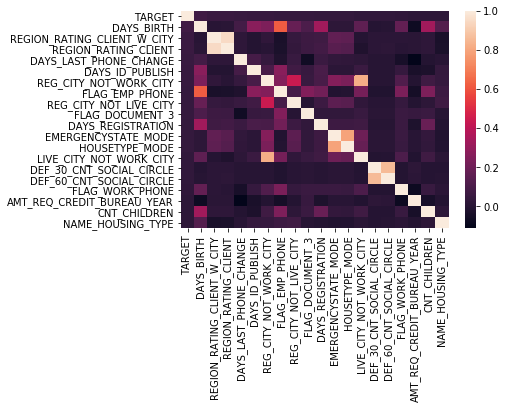

In [29]:
sns.heatmap(high_corrmat)

上記同様ほとんどA⑤で出した相関係数行列と変わった点はなかった。
<br>しかし一貫して変わらない項目
<br>・REGION_RATING_CLIENT(顧客が住んでいる州の当社の評価)/REGION_RATING_CLIENT_W_CITY(顧客が住んでいる都市の当社の評価(r=0.95)
<br>・DEF_30_CNT_SOCIAL_CIRCLE(30日の延滞が何回あったか)/DEF_60_CNT_SOCIAL_CIRCLE(60日の延滞が何回あったか)(r = 0.86)
<br>・LIVE_CITY_NOT_WORK_CITY(連絡先が仕事先と都市レベルで同じか)/REG_CITY_NOT_WORK_CITY(連絡先が仕事先と州レベルで同じか）(r = 0.82)
<br>等は客観的に見ても相関がお互いの相関が高そうな項目であり、データセット全体としては信頼できるデータであることが考えられる。                  

In [30]:
df["TARGET"]

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

### まとめ


#### <br>A：どういった項目がTARGETとの相関が高いのか、という疑問のもとラベルエンコーディングを行い相関係数を算出した。<br>しかしTARGETとの相関係数がどれも異様に低く相関を示さなかった。その理由はデータの形形式に不備があると考え、Bにて欠損値に着目して検討した。
#### <br>B　にて欠損値について概観したところ、データの半分に欠損値があり、さらにそのほとんどが欠損値が５０％以上を占めるデータだった。<br>その理由として欠損値が多い項目のほとんどが何らかの平均・最頻値・中央値だったことから、<br>これらは調べるのが困難で、なおかつ無理に調べる必要がそこまで無い重要度の低い項目だと考えた。<br>また、欠損値が多かった「OWN_CAR_AGE」や「EXT_SOURCE１」について、「OWN_CAR_AGE」は欠損値＝車を所持していないという意味だと考察した。<br>「EXT_SOURCE１」は日本の信用情報機関の事情と照らし合わせて、１つの会社で欠損値があっても他の会社に情報があるためEXT_SOURCEは総合的に考える必要があると考察した。<br>Aより相関が出ないのは欠損値が影響していると仮定し、Bでは欠損値のデータを概観した結果から欠損値が多い項目の内容を考慮し欠損値に対する処理を行った。
#### <br>CではBで欠損値を処理したデータを基に再度TARGETとの相関係数を算出した。<br>結果として欠損値を処理する前と相関係数はほとんど変わらなかった。<br>そのため、目的変数であるTARGETとどの項目もほとんど相関を示さない理由は、欠損値以外の要因があると考えられる。